<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Project- Tech- Employes Layoffs Prediction and Analysis</center>

**<center>Bigya Bajracharya </center>**
**<center>Sangam Shrestha </center>**

<hr style="border:2px solid lightblue"> </hr>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('LayOffDataset.csv')
dataset.shape

(3000, 26)

In [3]:
# exploring the dataset
dataset.head(10)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,3432,Maruk,Fraval,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,...,Field Operations,03-04-1949,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,3433,Latia,Costa,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,...,General - Eng,01-07-1942,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,3434,Sharlene,Terry,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,...,Engineers,07-03-1957,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,3435,Jac,McKinzie,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,...,Executive,15-05-1974,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,3436,Joseph,Martins,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,...,Engineers,11-11-1949,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [4]:
dataset.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')

In [5]:
dataset.TerminationType.value_counts()

TerminationType
Unk            1467
Involuntary     388
Voluntary       388
Resignation     380
Retirement      377
Name: count, dtype: int64

In [6]:
dataset.isnull().sum()

EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1467
Title                            0
Supervisor                       0
ADEmail                         18
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1467
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
dtype: int64

In [7]:
dataset.drop(columns=['TerminationDescription','EmpID','ADEmail','FirstName','LastName','DOB'],inplace=True)
dataset.head(10)

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,CCDR,Active,Contract,Zone C,Temporary,Unk,Production,Finance & Accounting,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,EW,Active,Contract,Zone A,Part-Time,Unk,Production,Aerial,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,PL,Active,Full-Time,Zone B,Part-Time,Unk,Sales,General - Sga,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,CCDR,Active,Contract,Zone A,Full-Time,Unk,Sales,Finance & Accounting,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,TNS,Active,Contract,Zone A,Temporary,Unk,Sales,General - Con,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,BPC,Active,Contract,Zone B,Full-Time,Unk,Sales,Field Operations,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,NEL,Active,Contract,Zone B,Part-Time,Unk,Sales,Executive,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   3000 non-null   object
 1   ExitDate                    1533 non-null   object
 2   Title                       3000 non-null   object
 3   Supervisor                  3000 non-null   object
 4   BusinessUnit                3000 non-null   object
 5   EmployeeStatus              3000 non-null   object
 6   EmployeeType                3000 non-null   object
 7   PayZone                     3000 non-null   object
 8   EmployeeClassificationType  3000 non-null   object
 9   TerminationType             3000 non-null   object
 10  DepartmentType              3000 non-null   object
 11  Division                    3000 non-null   object
 12  State                       3000 non-null   object
 13  JobFunctionDescription      3000 non-null   obje

In [9]:
# Filter the DataFrame to include only records with non-null ExitDate and involuntary and voluntary terminationType
df_with_exit_date = dataset[dataset['ExitDate'].notnull() & 
    ((dataset['TerminationType'].str.lower() == 'involuntary') | 
     (dataset['TerminationType'].str.lower() == 'voluntary'))]

df_with_exit_date

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
12,2022-05-25 00:00:00.000,2022-11-27 00:00:00.000,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,Sales,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3
16,2021-04-05 00:00:00.000,2023-05-12 00:00:00.000,Area Sales Manager,Lauren Jones,WBL,Active,Full-Time,Zone C,Part-Time,Voluntary,IT/IS,Project Management - Con,KY,Coordinator,Male,2621,Asian,Widowed,Fully Meets,3
17,2021-11-28 00:00:00.000,2022-02-04 00:00:00.000,Area Sales Manager,Matthew Jackson,NEL,Active,Contract,Zone A,Part-Time,Voluntary,Sales,Engineers,KY,Director,Male,44553,Other,Widowed,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2020-01-13 00:00:00.000,2022-10-21 00:00:00.000,Production Technician I,Karen Lin,WBL,Leave of Absence,Contract,Zone B,Full-Time,Voluntary,Production,Field Operations,MA,Engineer,Female,12351,White,Single,Fully Meets,1
2979,2020-03-25 00:00:00.000,2023-04-26 00:00:00.000,Production Technician I,Tina Munoz,NEL,Voluntarily Terminated,Contract,Zone C,Temporary,Involuntary,Production,Finance & Accounting,MA,Administration,Female,24805,Other,Single,Fully Meets,5
2980,2021-04-15 00:00:00.000,2023-05-11 00:00:00.000,Production Technician II,Aaron Stewart,WBL,Active,Part-Time,Zone C,Temporary,Voluntary,Production,Field Operations,MA,Construction Manager,Female,18000,Asian,Single,Fully Meets,5
2993,2020-10-10 00:00:00.000,2022-08-05 00:00:00.000,Production Technician I,Lynn Smith,NEL,Active,Contract,Zone A,Full-Time,Voluntary,Production,Field Operations,MA,Laborer,Female,18079,Other,Married,Fully Meets,2


In [10]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 6 to 2997
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   776 non-null    object
 1   ExitDate                    776 non-null    object
 2   Title                       776 non-null    object
 3   Supervisor                  776 non-null    object
 4   BusinessUnit                776 non-null    object
 5   EmployeeStatus              776 non-null    object
 6   EmployeeType                776 non-null    object
 7   PayZone                     776 non-null    object
 8   EmployeeClassificationType  776 non-null    object
 9   TerminationType             776 non-null    object
 10  DepartmentType              776 non-null    object
 11  Division                    776 non-null    object
 12  State                       776 non-null    object
 13  JobFunctionDescription      776 non-null    object
 14

In [14]:
print(pd.unique(df_with_exit_date.loc[:, 'StartDate']))
print(pd.unique(df_with_exit_date.loc[:, 'ExitDate']))



['2022-04-06 00:00:00.000' '2020-11-06 00:00:00.000'
 '2022-05-25 00:00:00.000' '2021-04-05 00:00:00.000'
 '2021-11-28 00:00:00.000' '2020-05-26 00:00:00.000'
 '2023-05-10 00:00:00.000' '2021-02-18 00:00:00.000'
 '2022-04-28 00:00:00.000' '2018-09-13 00:00:00.000'
 '2018-12-03 00:00:00.000' '2023-06-12 00:00:00.000'
 '2022-08-02 00:00:00.000' '2019-03-07 00:00:00.000'
 '2022-10-31 00:00:00.000' '2023-04-26 00:00:00.000'
 '2018-09-25 00:00:00.000' '2018-11-20 00:00:00.000'
 '2019-08-27 00:00:00.000' '2023-04-17 00:00:00.000'
 '2022-09-02 00:00:00.000' '2021-04-10 00:00:00.000'
 '2020-12-13 00:00:00.000' '2020-01-03 00:00:00.000'
 '2021-06-01 00:00:00.000' '2020-04-06 00:00:00.000'
 '2021-07-31 00:00:00.000' '2023-07-11 00:00:00.000'
 '2019-02-09 00:00:00.000' '2019-04-19 00:00:00.000'
 '2020-03-09 00:00:00.000' '2021-05-18 00:00:00.000'
 '2021-07-21 00:00:00.000' '2020-11-20 00:00:00.000'
 '2021-11-23 00:00:00.000' '2021-10-05 00:00:00.000'
 '2021-04-11 00:00:00.000' '2019-08-01 00:00:0

In [19]:
# convert the datetime column to a pandas datetime object
df_with_exit_date['StartDate'] = pd.to_datetime(df_with_exit_date['StartDate'])

# convert the datetime column to an integer
df_with_exit_date['StartDate'] = df_with_exit_date['StartDate'].astype('int64')

# divide the resulting integer by the number of nanoseconds in a second
df_with_exit_date['StartDate'] = df_with_exit_date['StartDate'].div(10**9)

# convert the datetime column to a pandas datetime object
df_with_exit_date['ExitDate'] = pd.to_datetime(df_with_exit_date['ExitDate'])

# convert the datetime column to an integer
df_with_exit_date['ExitDate'] = df_with_exit_date['ExitDate'].astype('int64')

# divide the resulting integer by the number of nanoseconds in a second
df_with_exit_date['ExitDate'] = df_with_exit_date['ExitDate'].div(10**9)


C:\Users\Student189\AppData\Local\Temp\ipykernel_8728\3216872874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_exit_date['StartDate'] = pd.to_datetime(df_with_exit_date['StartDate'])
C:\Users\Student189\AppData\Local\Temp\ipykernel_8728\3216872874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_exit_date['StartDate'] = df_with_exit_date['StartDate'].astype('int64')
C:\Users\Student189\AppData\Local\Temp\ipykernel_8728\3216872874.py:8: SettingWithCopyWarning: 
A value is trying to b

In [20]:
print(pd.unique(df_with_exit_date.loc[:, 'Title']))
print(pd.unique(df_with_exit_date.loc[:, 'Supervisor']))
print(pd.unique(df_with_exit_date.loc[:, 'BusinessUnit']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeStatus']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeType']))
print(pd.unique(df_with_exit_date.loc[:, 'PayZone']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeClassificationType']))
print(pd.unique(df_with_exit_date.loc[:, 'TerminationType']))
print(pd.unique(df_with_exit_date.loc[:, 'DepartmentType']))
print(pd.unique(df_with_exit_date.loc[:, 'Division']))
print(pd.unique(df_with_exit_date.loc[:, 'State']))
print(pd.unique(df_with_exit_date.loc[:, 'JobFunctionDescription']))
print(pd.unique(df_with_exit_date.loc[:, 'GenderCode']))
print(pd.unique(df_with_exit_date.loc[:, 'RaceDesc']))
print(pd.unique(df_with_exit_date.loc[:, 'MaritalDesc']))
print(pd.unique(df_with_exit_date.loc[:, 'Performance Score']))

['Area Sales Manager' 'Production Technician I' 'Production Technician II'
 'Sr. Network Engineer' 'Network Engineer' 'IT Support'
 'Enterprise Architect' 'Data Analyst' 'Sr. DBA' 'Sr. Accountant'
 'Software Engineer' 'Database Administrator' 'Data Architect' 'CIO'
 'Senior BI Developer' 'Shared Services Manager' 'Production Manager'
 'President & CEO' 'Accountant I' 'Software Engineering Manager'
 'BI Developer' 'Sales Manager' 'BI Director' 'IT Manager - Infra'
 'IT Manager - Support' 'Data Analyst ' 'Director of Operations'
 'IT Manager - DB' 'Director of Sales' 'IT Director'
 'Administrative Assistant']
['Jacob Braun' 'Tracy Marquez' 'Charles Parks' 'Lauren Jones'
 'Matthew Jackson' 'Michelle Evans MD' 'Ashley Reeves' 'Michael Bradshaw'
 'Elizabeth Anderson' 'Brianna Mathews' 'Mark Harris' 'Samantha Cardenas'
 'Madison Wilson' 'Brandon Harris' 'Victoria Krause' 'Peter Harvey'
 'Patrick Daniel' 'Bryan Douglas' 'Jordan Vega' 'Lindsay Chang'
 'Sharon Ruiz' 'Cheryl Henry' 'Teresa Danie

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X = df_with_exit_date.iloc[:, :-1]
Y = df_with_exit_date.iloc[:, -1]

ct = ColumnTransformer([('cat_encoder', OneHotEncoder(), ['Title','Supervisor','BusinessUnit','EmployeeStatus','EmployeeType','PayZone','EmployeeClassificationType','TerminationType','DepartmentType','Division','State','JobFunctionDescription','GenderCode','RaceDesc','MaritalDesc','Performance Score'])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 

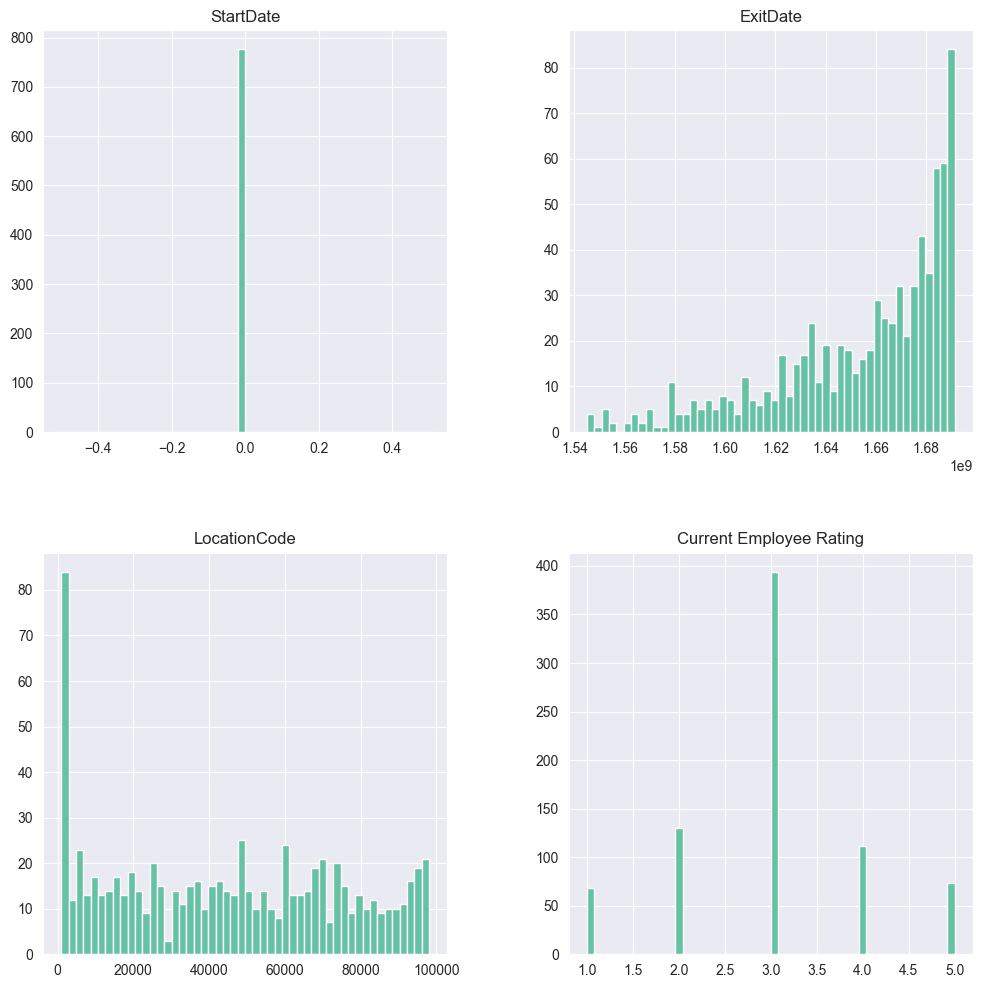

In [22]:
df_with_exit_date.hist(bins=50,figsize=(12,12))
plt.show()